In [3]:
import vtk
import os
import numpy as np
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import time

In [17]:
all_data = []
data_name_list = ["rectangle_20s_dx=5e-2", "run_008", "rectangle_20s_1e-1", "run_016", "rectangle_20s_2e-1", "run_04","run_05", "run_08"]
labels = ['0.05', '0.08', '0.1', '0.16', '0.2', '0.4', '0.5', '0.8']
for item in data_name_list:
    total_data = []
    data_folder = os.path.join(os.getcwd(), item)
    for filename in sorted(os.listdir(data_folder)):
        if "particles_" in filename and ".vtp" in filename:
            reader = vtk.vtkXMLPolyDataReader()
            reader.SetFileName(os.path.join(data_folder, filename))
            reader.Update()
            pdata = reader.GetOutput()
            total_data.append(pdata)
    all_data.append(total_data)

In [113]:
def get_fig(num,total_data):
    v_data = total_data[num].GetPointData().GetArray('Velocity')
    direction = True
    v_x = []
    v_y = []
    x = []
    y = []
    num_particle = total_data[num].GetNumberOfPoints()
    for i in range(num_particle):
        v_x.append(v_data.GetTuple(i)[0])
        v_y.append(v_data.GetTuple(i)[1])
        x.append(total_data[num].GetPoint(i)[0])
        y.append(total_data[num].GetPoint(i)[1])
    count_negtive = 0
    count_positive = 0
    count_zeros = 0
    for i in range(num_particle):
        if v_x[i] > 0:
            count_positive += 1
        elif v_x[i] == 0:
            count_zeros += 1
        else:
            count_negtive += 1
    if (count_positive)/num_particle >= (count_negtive)/num_particle:
        direction = True
    else:
        direction = False
    v_x = np.array(v_x)
    v_y = np.array(v_y)
    x = np.array(x)
    y = np.array(y)
    bottom = int(num_particle*0.005)
    mid = int(bottom/2) 
    temp_x = np.array([])
    temp_y = np.array([])
    # for the first 10 iterations zeros
    
    v_total = np.sqrt(v_x**2 + v_y**2)
    
    if count_zeros/num_particle >= 0.6 and direction == True:
        y_peak_position=(y[v_total == v_total.max()].mean())
        x_peak_position=(x[v_total == v_total.max()].mean())
        max_v = 0
    else:
        if direction == True:
            for i in range(num_particle):
                if v_x[i] < 0:
                    v_x[i] = 0
                    v_y[i] = 0
        else:
            for i in range(num_particle):
                if v_x[i] > 0:
                    v_x[i] = 0
                    v_y[i] = 0
        v_total = np.sqrt(v_x**2 + v_y**2)
        
        temp_x = np.argsort(-v_total)[:bottom]
        temp_x = temp_x[mid-10:mid+10]
        temp_y = np.argsort(-v_total)[:bottom]
        temp_y = temp_y[mid-10:mid+10]
        x_peak_position = x[temp_x].mean()
        y_peak_position = y[temp_y].mean()
        max_v = v_total[temp_x]
    
    fig = plt.figure() 
    ax1 = fig.add_subplot(111) 
    ax1.set_title('Scatter Plot') 
    plt.xlabel('X') 
    plt.ylabel('Y') 
    ax1.scatter(x,y) 
    ax1.scatter(x_peak_position,y_peak_position,s=128,c='r',marker='o') 
    plt.legend('x1') 
    fig1 = plt.gcf()
# #     plt.show()
#     ####################################
    fig1.savefig('fig_{:05}.png'.format(num), dpi=100)
    return max_v,x_peak_position,y_peak_position
    #####################################
#     plt.show()





In [116]:
import imageio

N_files = 300 #number of files to read
filenames = [];
for i in range(N_files):
    filenames.append('fig_{:05}.png'.format(i))
        
with imageio.get_writer('animation.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [117]:
def get_x_y_v(total_data):
    max_v = []
    max_x = []
    max_y = []
    total_information = []
    for i in range(len(total_data)):
        v,x,y = get_fig(i,total_data)
        max_v.append(v)
        max_x.append(x)
        max_y.append(y)
    
    total_information.append(max_x)
    total_information.append(max_y)
    total_information.append(max_v)
    
    return total_information


In [118]:
len(data_name_list[2])
len(data_name_list)

8

In [ ]:
total = []
for i in range(len(data_name_list)):
    t = []
    for j in range(len(all_data[i])):
        t.append(j/10)
    information = get_x_y_v(all_data[i])
    total.append(information[0])

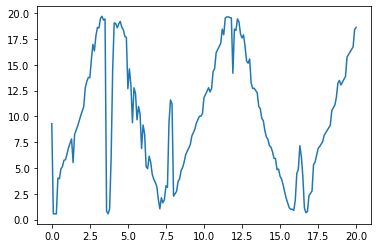

In [111]:
plt.plot(t, total[5])

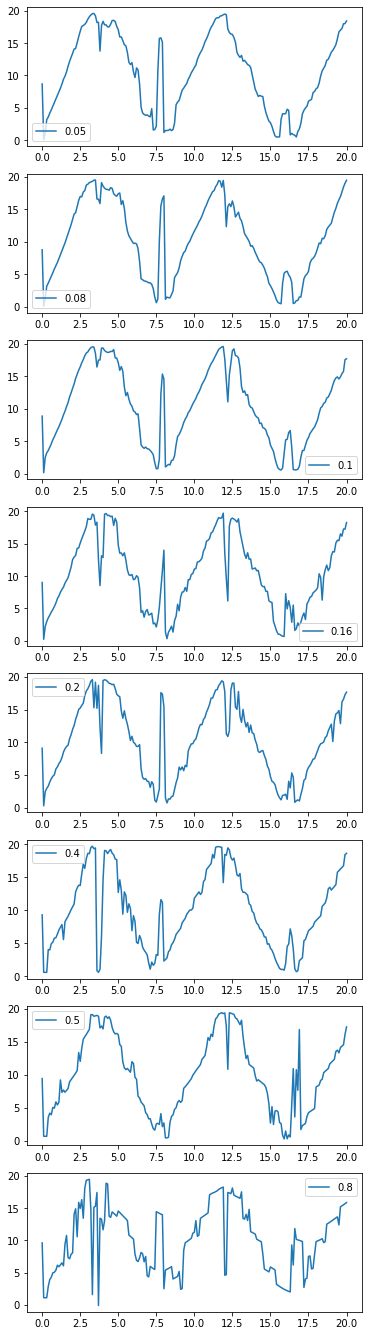

In [112]:
fig, ax = plt.subplots(8, 1, figsize=(6, 24))
for i, ax_i in enumerate(ax.ravel()):
    ax_i.plot(t, total[i], label=labels[i])
    ax_i.legend()

In [31]:
#expected shallow wave speed 
h1 = 5
h2 = 2
h = (h1+h2)/2# average initial water depth 
v_expected_high = np.sqrt(9.81*h)
print(v_expected_high)

5.859607495387383


In [9]:
q = data_name_list[2]

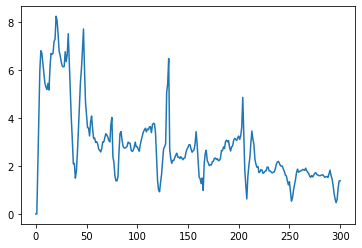

In [8]:
t = []
for i in range(np.array(total_data).shape[0]):
    t.append(i/10)
plt.plot(t,max_v)


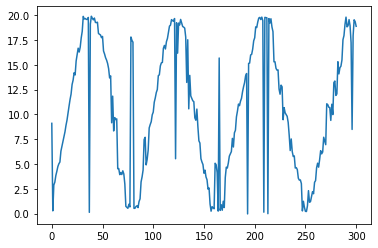

In [9]:
plt.plot(t,max_x)

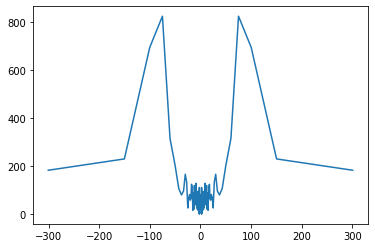

In [38]:
from scipy import fftpack

X = fftpack.fft(max_x - np.mean(max_x))
freqs = fftpack.fftfreq(len(max_x))
mask = freqs != 0
X = X[mask]
periods = 1/(freqs[mask])

plt.plot(periods, np.abs(X))

In [41]:
periods[np.argmax(np.abs(X))+1]

60.199999999999996

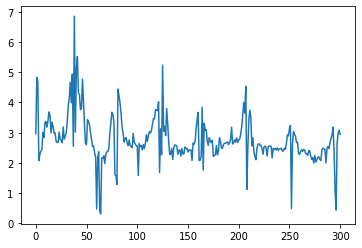

In [10]:
plt.plot(t,max_y)